In [1]:
import pandas as pd

# Overview for portfolio demo

We are combining OLINK & clinical data from Covid patients. Specifically, we are replicating figure B (page 5) from the [Olink & MGH study](https://olink.com/application/mgh-covid-19-study/)

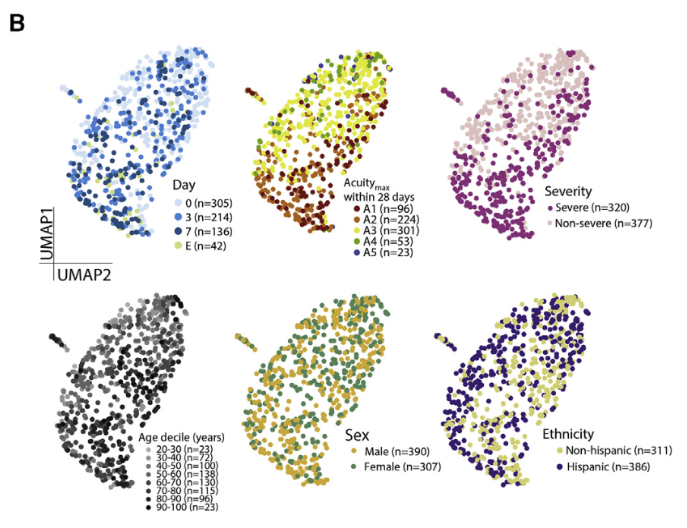

**Original data sources** (shown to help audience understand)
- Clinical data for covid patients
- OLINK data for covid patients

**Cleaned and transformed data sources** (used for a smoother demo)
- olink_reshaped.csv
- umap_clinical.csv

In [32]:
data_dir = "../data/"

**Original Clinical Data**

In [33]:
clinical_path = data_dir + "MGH_COVID_Clinical_Info.csv"
olink_path = data_dir + "MGH_COVID_OLINK_NPX.csv"

In [34]:
# clinical data for each covid patient (i.e. Age cat, BMI cat)
# subject_id is the join key for the olink data
pd.read_csv(clinical_path, sep=";").head()

,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2,2,0,0,0,0,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,3,4,0,1,0,0,0,0,...,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2,0,0,0,0,0,0,...,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,3,3,0,0,0,1,1,0,...,5.0,3.0,NaN,3.0,5.0,3.0,1.0,4.0,4.0,3.0


**Original OLINK Data**

In [25]:
# We want a df with 
    # SampleID as rows
    # UniProt as columns
    # NPX as values
pd.read_csv(olink_path).head()

,SampleID,subject_id,Timepoint,OlinkID,UniProt,Panel,PlateID,LOD,NPX
0,1_D0,1.0,D0,OID21311,Q9BTE6,ONCOLOGY,20200772_Plate5_NEURO_ONC,0.7204,3.2277
1,1_D0,1.0,D0,OID20921,Q96IU4,NEUROLOGY,20200772_Plate5_NEURO_ONC,0.5696,0.7205
2,1_D0,1.0,D0,OID21280,P00519,ONCOLOGY,20200772_Plate5_NEURO_ONC,0.5313,2.6293
3,1_D0,1.0,D0,OID21269,P09110,ONCOLOGY,20200772_Plate5_NEURO_ONC,2.0588,3.2670
4,1_D0,1.0,D0,OID20159,P16112,CARDIOMETABOLIC,20200772_Plate5_CARDIO_INF,1.1623,2.0308


# Part 3 | Unsupervised Machine Learning

Applying dimensionality reduction to the OLINK data (using UMAP)

### UMAP


Uniform Manifold Approximation and Projection

- Novel technique for dimensionality reduction
- Practical scalable algorithm that applies to real world data
- Good at preserving global structure


[Source](https://arxiv.org/abs/1802.03426#:~:text=UMAP%20)

In [5]:
import numpy as np

In [6]:
np.__version__

'1.20.1'

In [7]:
!pip install llvmlite --ignore-installed

  Using cached llvmlite-0.37.0-cp38-cp38-win_amd64.whl (17.0 MB)


In [ ]:
!pip install umap-learn

In [8]:
import umap

In [9]:
reducer = umap.UMAP(random_state = 1)

**Preprocessed OLINK data**

In [36]:
# 
olink = pd.read_csv(data_dir+"olink_reshaped.csv", index_col = "SampleID")

In [37]:
# each sample belongs to a subject_id
# each sample has values for the 1420 different UniProts
olink.head()

,A1L4H1,A4D1B5,A6NI73,B1AKI9,NTproBNP,O00161,O00175,O00182,O00186,O00214,...,Q9Y639,Q9Y653,Q9Y662,Q9Y680,Q9Y6A5,Q9Y6D9,Q9Y6K9,Q9Y6N7,Q9Y6Q6,Q9Y6Y9
SampleID,,,,,,,,,,,,,,,,,,,,,
100_D0,-0.795372,-0.643623,-0.068215,-0.508872,-1.111091,0.339765,-1.993510,-0.189682,-0.248565,0.474145,...,-0.798474,-0.951386,1.445849,0.794718,0.149945,-0.219635,0.666942,0.312312,-0.509215,-1.361952
100_D3,-0.766913,-0.167394,-0.318063,-0.333866,-0.887763,-0.872724,-1.314471,-0.130315,-0.975358,-0.055415,...,-1.834410,-1.479851,0.876646,-0.517206,-1.423969,-0.340284,-0.879210,0.231994,-0.383722,-0.906616
101_D0,-0.342279,0.524545,-0.017572,-1.341097,-0.770592,-0.403410,-1.076779,-0.391423,-0.067999,-0.446932,...,-0.554102,-0.427665,0.280275,3.020541,-0.638954,-0.389184,-0.390747,-0.797231,-1.150577,-0.590332
101_D3,-1.260960,-0.414675,-1.217015,-1.370355,-0.093805,-1.554264,-0.999780,-0.869601,-0.812582,-1.091708,...,-0.626356,-1.307549,-0.732756,-1.773295,-1.227836,-0.833392,-1.587099,-1.350346,-1.185721,-0.947421
101_D7,-0.017946,2.235345,-0.738516,-1.994795,-0.126661,2.666279,0.450222,0.292393,4.000000,4.000000,...,-0.261970,-0.698634,-0.846800,4.000000,4.000000,0.282064,2.820314,-0.160279,-0.564182,-1.036037


In [15]:
embedding = reducer.fit_transform(olink)

In [17]:
embedding

array([[12.012893 ,  4.391543 ],
       [10.944441 ,  1.3657091],
       [12.126486 ,  2.4613256],
       ...,
       [ 9.947157 ,  3.456318 ],
       [ 9.62046  ,  4.231816 ],
       [ 9.767335 ,  4.1681304]], dtype=float32)

In [19]:
embedding = pd.DataFrame(embedding)

In [20]:
embedding.head()

,0,1
0,12.012893,4.391543
1,10.944441,1.365709
2,12.126486,2.461326
3,11.690419,1.123063
4,10.623152,7.456595


In [21]:
import seaborn as sns

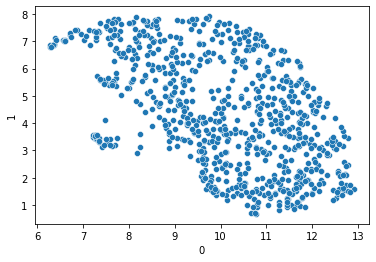

In [22]:
sns.scatterplot(data = embedding, x = 0, y = 1)

**Preprocessed clinical data with UMAP values joined on subject_id**

In [29]:
df = pd.read_csv(data_dir+"umap_clinical.csv")

In [30]:
df.head()

,0,1,SampleID,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,...,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat,Severity
0,11.926238,7.023535,100_D0,100,1,1,4,0,0,0,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
1,12.635524,4.482101,100_D3,100,1,1,4,0,0,0,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
2,12.966260,5.941173,101_D0,101,1,2,1,0,0,0,...,2.0,3.0,2.0,4.0,3.0,2.0,1.0,2.0,3.0,Non-severe
3,13.526190,4.616873,101_D3,101,1,2,1,0,0,0,...,2.0,3.0,2.0,4.0,3.0,2.0,1.0,2.0,3.0,Non-severe
4,9.018952,9.169617,101_D7,101,1,2,1,0,0,0,...,2.0,3.0,2.0,4.0,3.0,2.0,1.0,2.0,3.0,Non-severe


In [ ]:
# Severity is based on AcutiyMax (see page 4 in study)
    # severe: Acuitymax A1–A2
    # non-severe: Acuitymax A3–A5

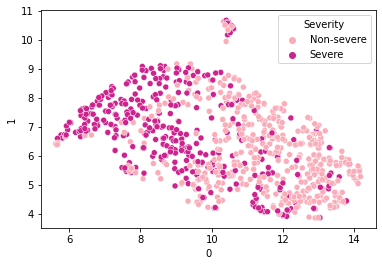

In [28]:
sns.scatterplot(data = df, x = "0", y = "1", hue = "Severity", palette = "RdPu")

# Part 3.1 | Supervised Machine Learning

Predicting Breast Cancer

## Breast Cancer | First inspection

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/NilsSkoglund/ki_workshop_public/main/breast_cancer_clf.csv")

In [30]:
df

,worst area,worst perimeter,worst texture,radius error,worst smoothness,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,concave points error,symmetry error,fractal dimension error,worst radius,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_var
0,2019.0,184.60,17.33,1.0950,0.16220,17.99,10.38,122.80,1001.0,0.11840,...,0.01587,0.03003,0.006193,25.380,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,1956.0,158.80,23.41,0.5435,0.12380,20.57,17.77,132.90,1326.0,0.08474,...,0.01340,0.01389,0.003532,24.990,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,1709.0,152.50,25.53,0.7456,0.14440,19.69,21.25,130.00,1203.0,0.10960,...,0.02058,0.02250,0.004571,23.570,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,567.7,98.87,26.50,0.4956,0.20980,11.42,20.38,77.58,386.1,0.14250,...,0.01867,0.05963,0.009208,14.910,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,1575.0,152.20,16.67,0.7572,0.13740,20.29,14.34,135.10,1297.0,0.10030,...,0.01885,0.01756,0.005115,22.540,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2027.0,166.10,26.40,1.1760,0.14100,21.56,22.39,142.00,1479.0,0.11100,...,0.02454,0.01114,0.004239,25.450,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,1731.0,155.00,38.25,0.7655,0.11660,20.13,28.25,131.20,1261.0,0.09780,...,0.01678,0.01898,0.002498,23.690,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,1124.0,126.70,34.12,0.4564,0.11390,16.60,28.08,108.30,858.1,0.08455,...,0.01557,0.01318,0.003892,18.980,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,1821.0,184.60,39.42,0.7260,0.16500,20.60,29.33,140.10,1265.0,0.11780,...,0.01664,0.02324,0.006185,25.740,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Workflow overview

- x & y
- train test split
- preprocessing
- model selection (training)
- predictions on test data

In [31]:
X = df.drop("target_var", axis = 1)

In [32]:
y = df["target_var"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(X_train)

StandardScaler()

In [38]:
X_train[:] = scaler.transform(X_train)

<ipython-input-38-6a8f4a90e56d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[:] = scaler.transform(X_train)
C:\Users\nilss\anaconda3\lib\site-packages\pandas\core\frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\Users\nilss\anaconda3\lib\site-packages\pandas\core\frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [39]:
X_test[:] = scaler.transform(X_test)

<ipython-input-39-e5340a5e4fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[:] = scaler.transform(X_test)
C:\Users\nilss\anaconda3\lib\site-packages\pandas\core\frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\Users\nilss\anaconda3\lib\site-packages\pandas\core\frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [40]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [41]:
classifiers = [
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier()
]

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
for i in classifiers:
    grid = GridSearchCV(i, param_grid = {}, cv = 5, scoring = "accuracy")
    
    grid.fit(X_train, y_train)
    
    print("Train score for:", i, "=", grid.best_score_)
    print("")

Train score for: RandomForestClassifier() = 0.9572784810126581

Train score for: LogisticRegression() = 0.9748101265822784

Train score for: KNeighborsClassifier() = 0.9547151898734176

